In [21]:
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow import keras

## Looking into t-statistic of correlation.

array([ 0.        ,  1.18492211,  2.40658818,  3.70772879,  5.14550197,
        6.80685929,  8.84236959, 11.5563411 , 15.71976816, 24.34294451])

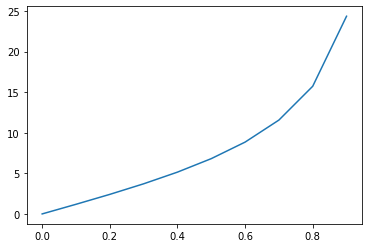

In [22]:
r = np.arange(0,1,1/10)
n = 141
y = r * np.sqrt(n-2)/np.sqrt((1-np.square(r)))
plt.plot(r,y)
plt.plot()
y

In [23]:
from scipy import stats
p_val_from_t = stats.t.sf(abs(3), 139)
p_val_from_t

0.0016002589159575178

------
# Test of using fft-- descrete cosine transformation as translational invariant representation
------

In [59]:
from scipy import fft
N = 10
M = waveforms.shape[-1] # number of time-samples
m = 50
keep_m_coef = np.zeros((N,M))
tests = waveforms[0:N,:]
dct_wf = fft.dct(tests,norm='ortho')
dct_wf.shape
keep_m_coef[:,:m] = dct_wf[:,:m]
reconstruction = fft.idct(keep_m_coef,norm='ortho')

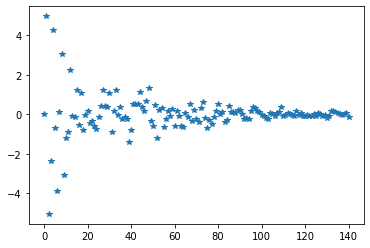

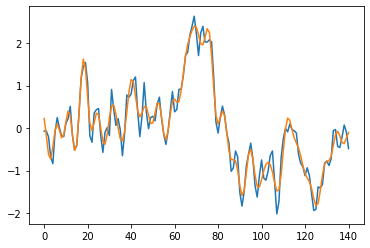

In [60]:
i_show = 8
plt.plot(dct_wf[i_show], '*')
plt.show()
plt.plot(tests[i_show])
plt.plot(reconstruction[i_show])
plt.show()

-----------------------
-----------------------
# Similarity Measure of waveforms test
-----------------------
-----------------------

In [24]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
print()
print('Loading matlab files...')
print()
wf_name = '../../matlab_files/gg_waveforms-R10_IL1B_TNF_03.mat'
ts_name = '../../matlab_files/gg_timestamps.mat'

waveforms = loadmat(wf_name)
#print(f' keys of matlab file: {waveforms.keys()}')
waveforms = waveforms['waveforms']
timestamps = loadmat(ts_name)['gg_timestamps']


Loading matlab files...



In [25]:
mean = np.mean(waveforms, axis=-1)
std  = np.std(waveforms, axis=-1)  
waveforms = waveforms - mean[:,None]
waveforms = waveforms/std[:,None]

np.min(waveforms,axis=-1)

array([-1.40669006, -1.37097606, -2.0767088 , ..., -2.52585796,
       -2.4565952 , -3.19585986])

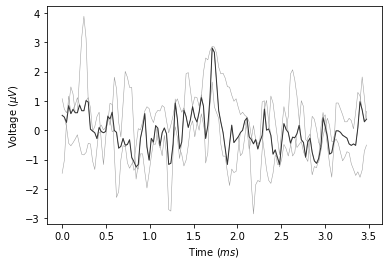

In [26]:
time = np.arange(0,3.5,3.5/waveforms.shape[-1])
ind = np.arange(10,31,10)

plt.plot(time,waveforms[ind,:].T,color = (0.6,0.6,0.6),lw=0.5)

plt.plot(time,np.median(waveforms[ind,:],axis=0),color = (0.2,0.2,0.2),lw=1)
plt.xlabel('Time $(ms)$')
plt.ylabel('Voltage $(\mu V)$')
plt.show()

In [64]:
wf = waveforms #[0::100,:]

waveform_range = np.arange(100,1000,100)
#print(waveform_range)
corr_matrix = np.matmul(wf,wf[waveform_range,:].T)*1/(wf.shape[-1]-1)
del wf
corr_matrix.shape
#np.matmul(waveforms,waveforms.T).shape

(136259, 9)

(136259, 9)
[8659 1057    1    1   82    1   27    1    1]


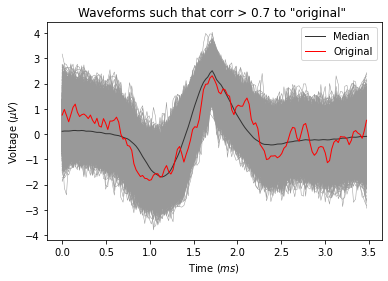

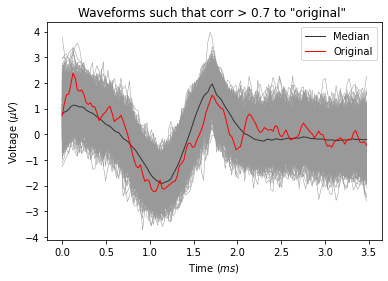

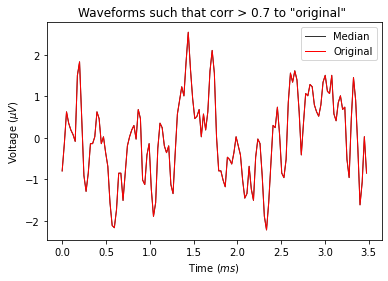

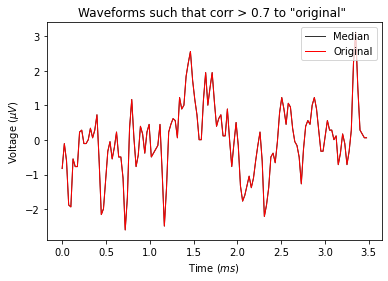

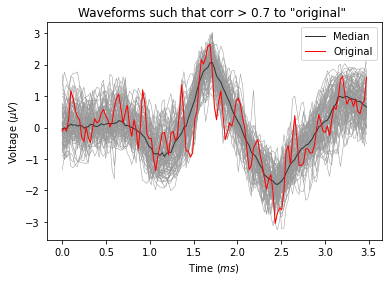

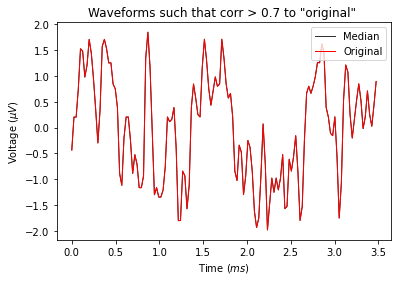

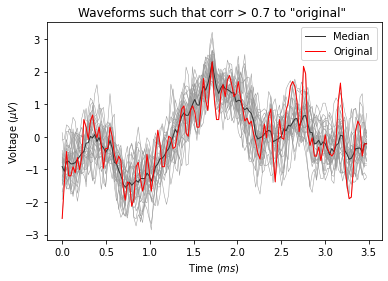

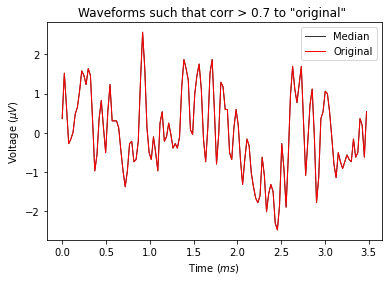

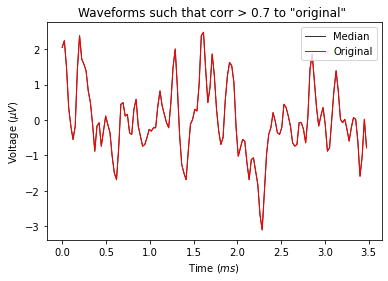

IndexError: index 9 is out of bounds for axis 1 with size 9

In [65]:
threshold = 0.7
bool_labels = corr_matrix>threshold
print(bool_labels.shape)
print(np.sum(bool_labels,axis=0))

time = np.arange(0,3.5,3.5/waveforms.shape[-1])
for ii in range(10):
    plt.plot(time,waveforms[bool_labels[:,ii]].T,color = (0.6,0.6,0.6),lw=0.5)
    plt.plot(time,np.median(waveforms[bool_labels[:,ii]],axis=0),color = (0.2,0.2,0.2),lw=1, label='Median')
    plt.plot(time,waveforms[waveform_range[ii],:],color = (1,0,0),lw=1, label='Original')
    plt.xlabel('Time $(ms)$')
    plt.ylabel('Voltage $(\mu V)$')
    plt.title(f'Waveforms such that corr > {threshold} to "original" ')
    plt.legend(loc='upper right')
    plt.show()


In [32]:
np.arange(20).reshape(2,-1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [63]:
ev_label = np.zeros((3,1))
std =  np.array((0.01,0.1))# ,0.015,0.2)).reshape((2,2))
aa = np.array((0.01,0.4)) #,0.1,0.1)).reshape((2,2))
is_increase = aa > std
print(is_increase)
if True in is_increase:
    is_increase = np.concatenate((is_increase,np.array((False,False)).reshape((2,1))),axis=0)
    print(is_increase)
    ev_label[is_increase] = 1
    if sum(ev_label) > 1:
        ev_label
    print(ev_label)
else:
    ev_label[-1] = 1
    print(ev_label)

[False  True]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [1]:
import numpy as np
a = input('hej')

hej 1


In [4]:
str(None)

'None'

In [3]:
int(a)

1